# Monitor the powered-down LAT

##include rejection of data in Fermi orbit night, for selected mnemonics

###Robert Cameron, March 2018

In [1]:
from astropy.table import Table
from astropy.time import Time
from os import walk
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tutc18 = Time('2018-02-28 00:00:00')

In [3]:
nTIB = ('L_ACD_NX_TILE_T','L_ACD_NY_TILE_T','L_ACD_PX_TILE_T','L_ACD_PY_TILE_T','L_ACD_PZ_TILE_T',
        'L_MCH_NY_VHP0_T','L_MCH_NY_VHP1_T','L_MCH_NY_VHP2_T','L_MCH_NY_VHP3_T','L_MCH_NY_VHP4_T','L_MCH_NY_VHP5_T',
        'L_MCH_PY_VHP0_T','L_MCH_PY_VHP1_T','L_MCH_PY_VHP2_T','L_MCH_PY_VHP3_T','L_MCH_PY_VHP4_T','L_MCH_PY_VHP5_T',
        'L_RAD_NYNX_L_T', 'L_RAD_NYPX_L_T', 'L_RAD_PYNX_L_T', 'L_RAD_PYPX_L_T',
        'L_RAD_NYNX_U_T', 'L_RAD_NYPX_U_T', 'L_RAD_PYNX_U_T', 'L_RAD_PYPX_U_T')

In [4]:
path = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/off-LAT/"
files = []
for (dirpath, dirnames, filenames) in walk(path):
    files.extend(filenames)
#files

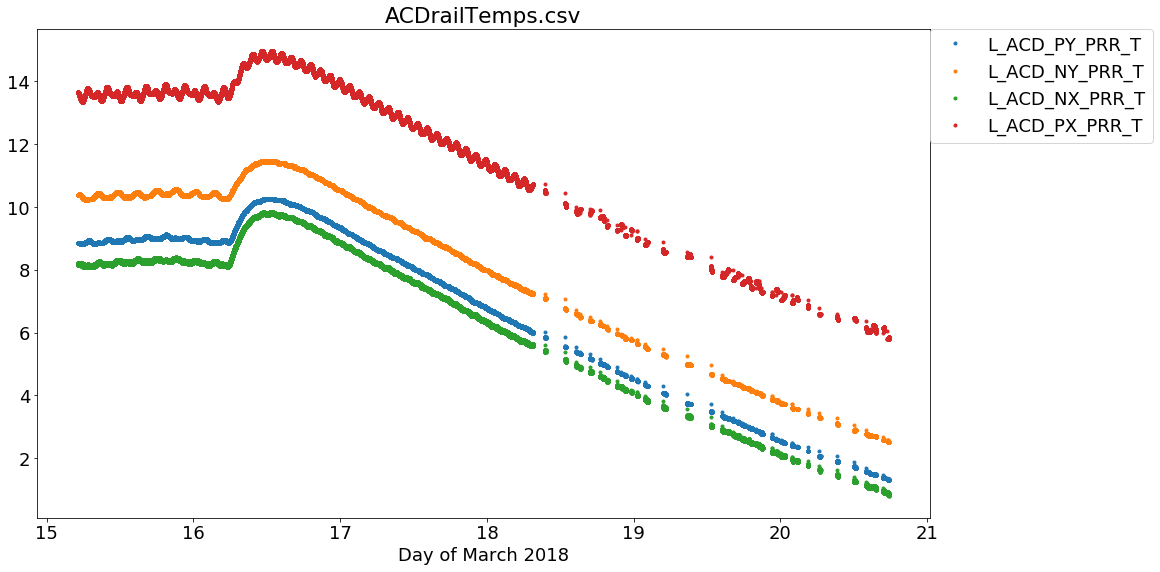

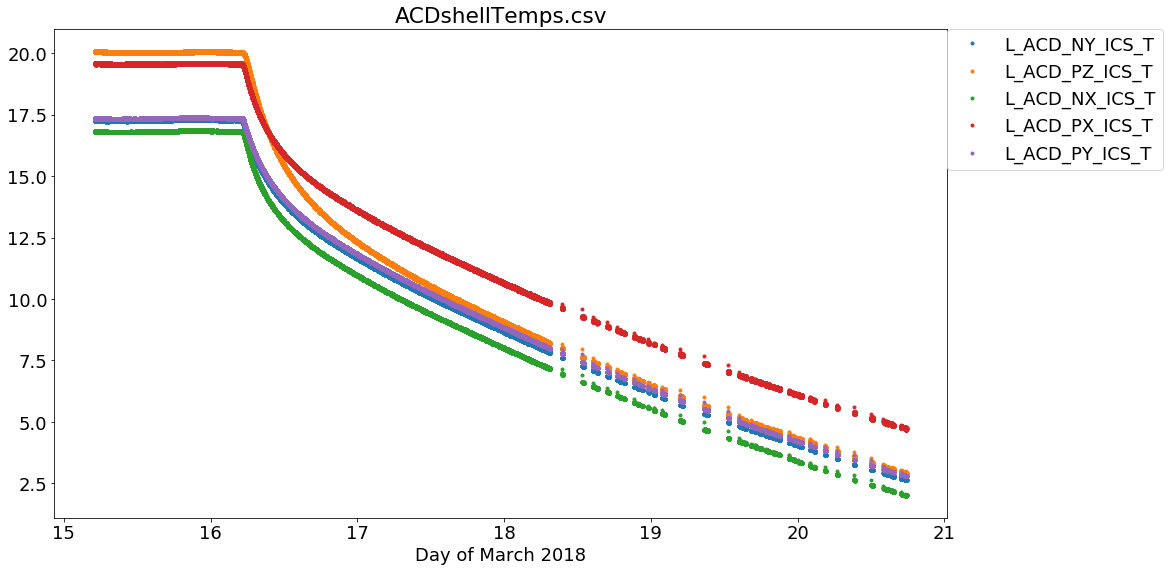

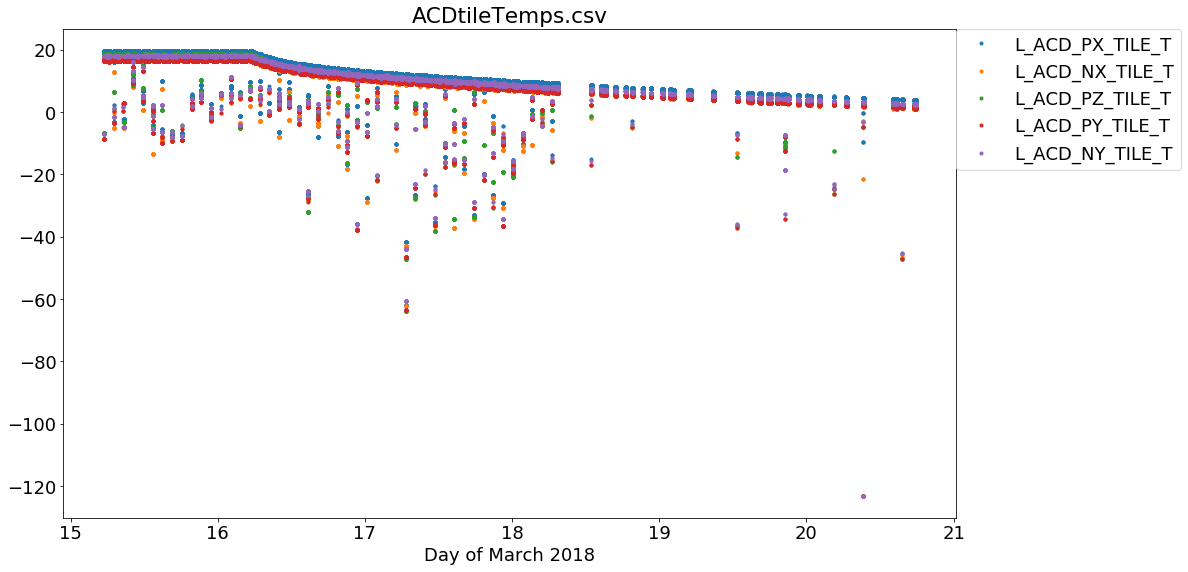

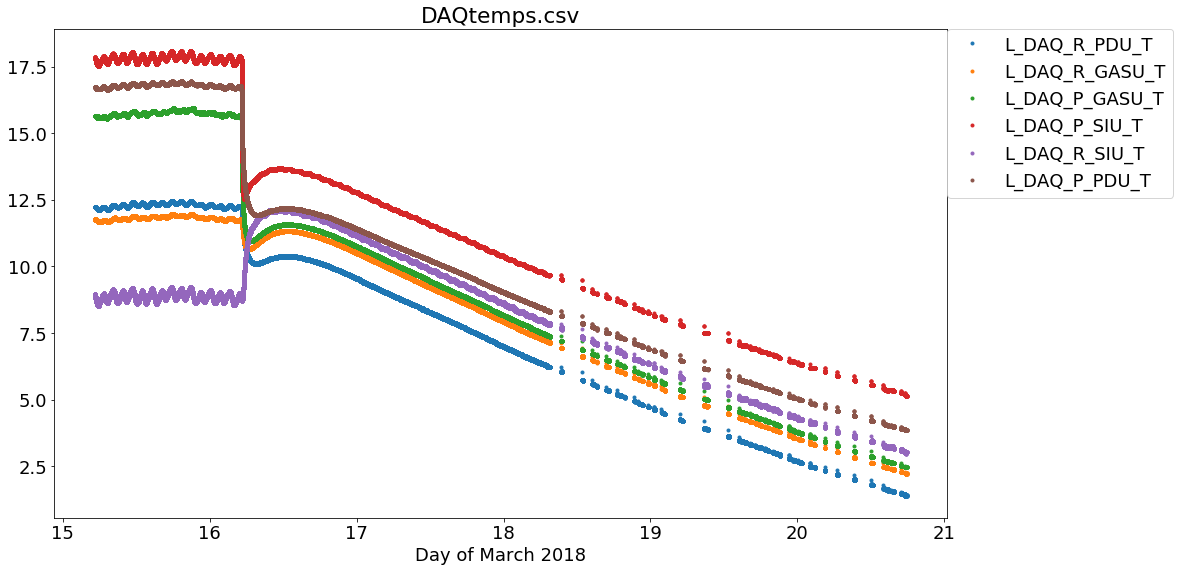

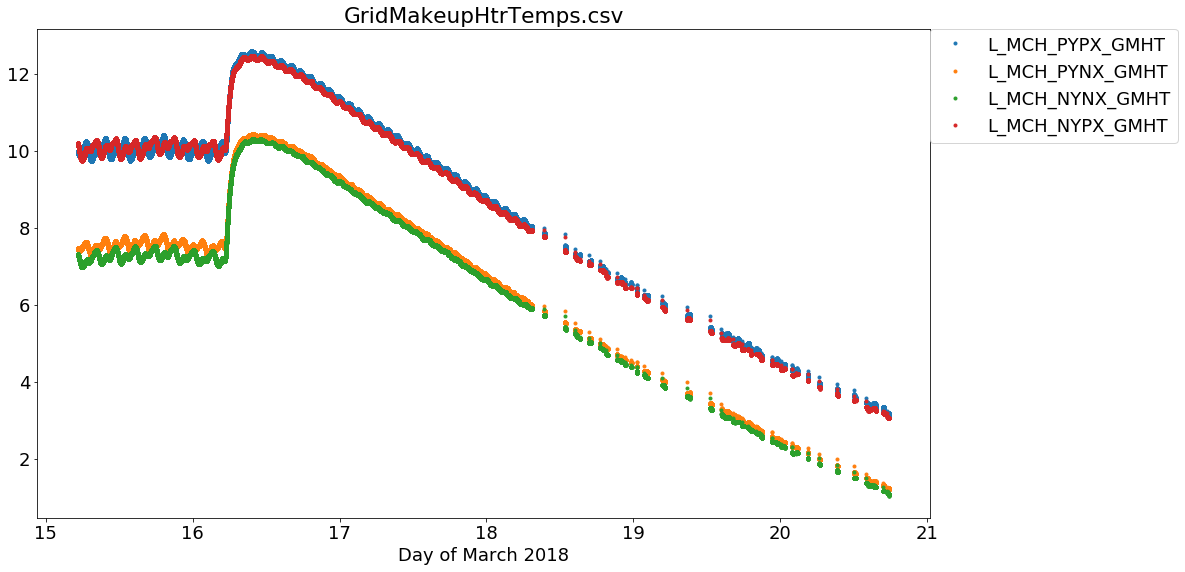

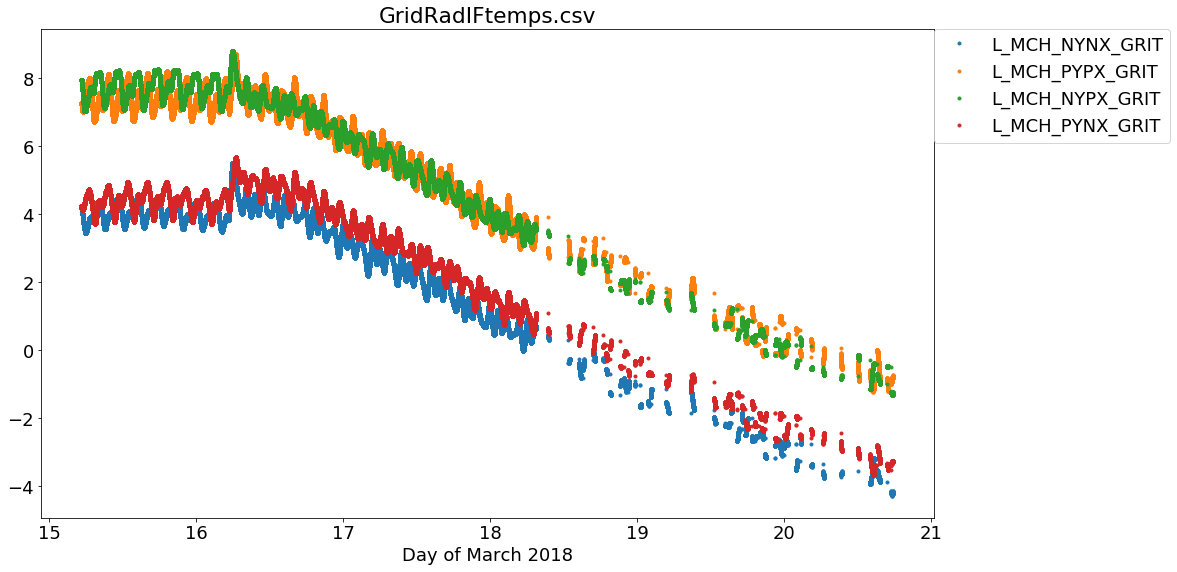

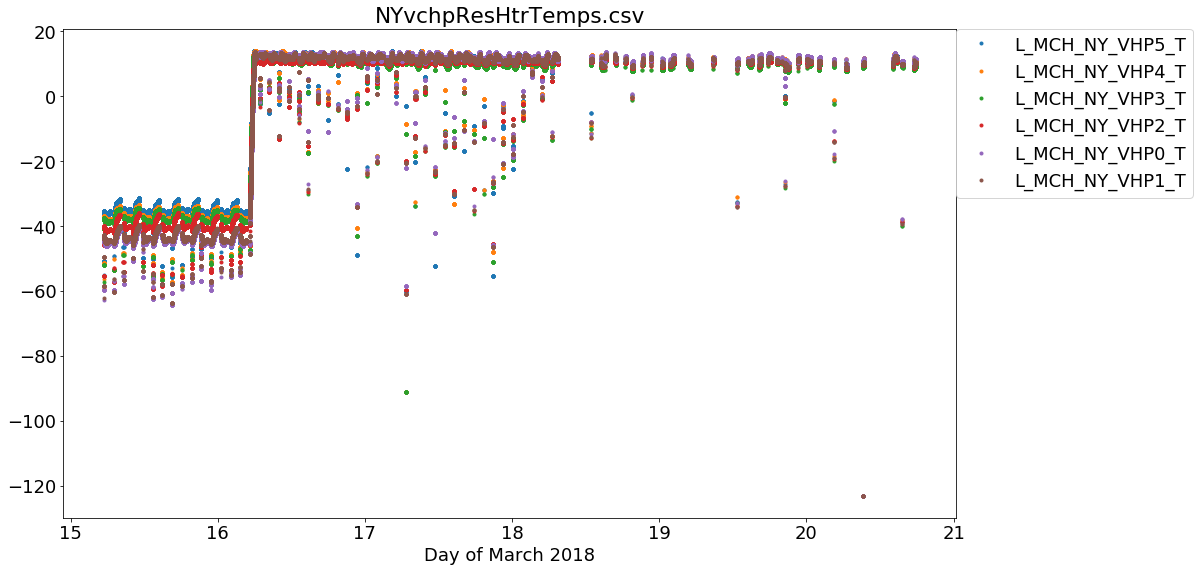

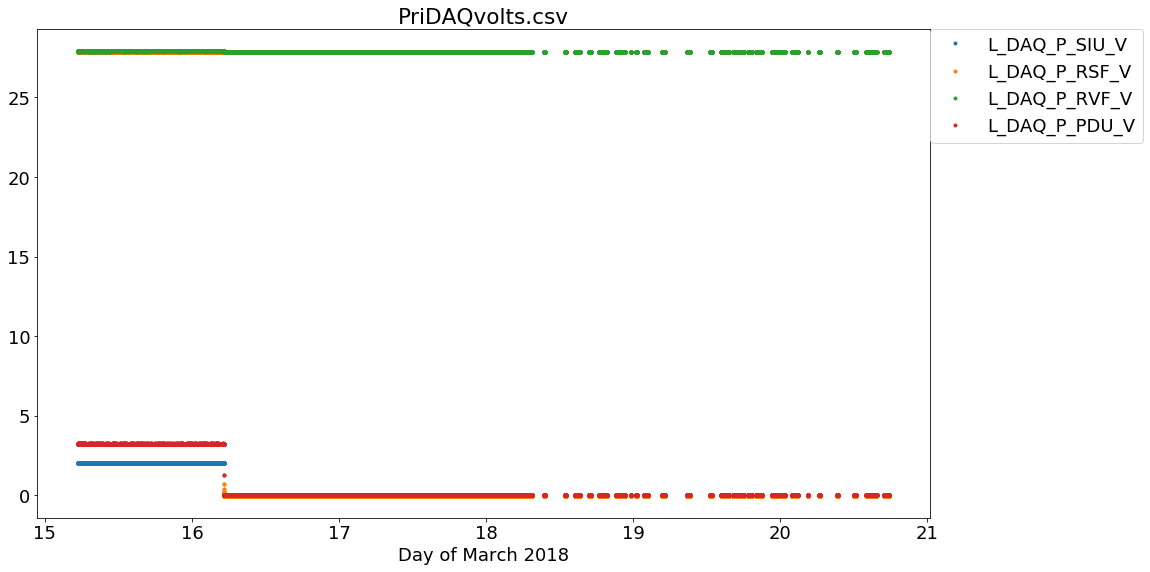

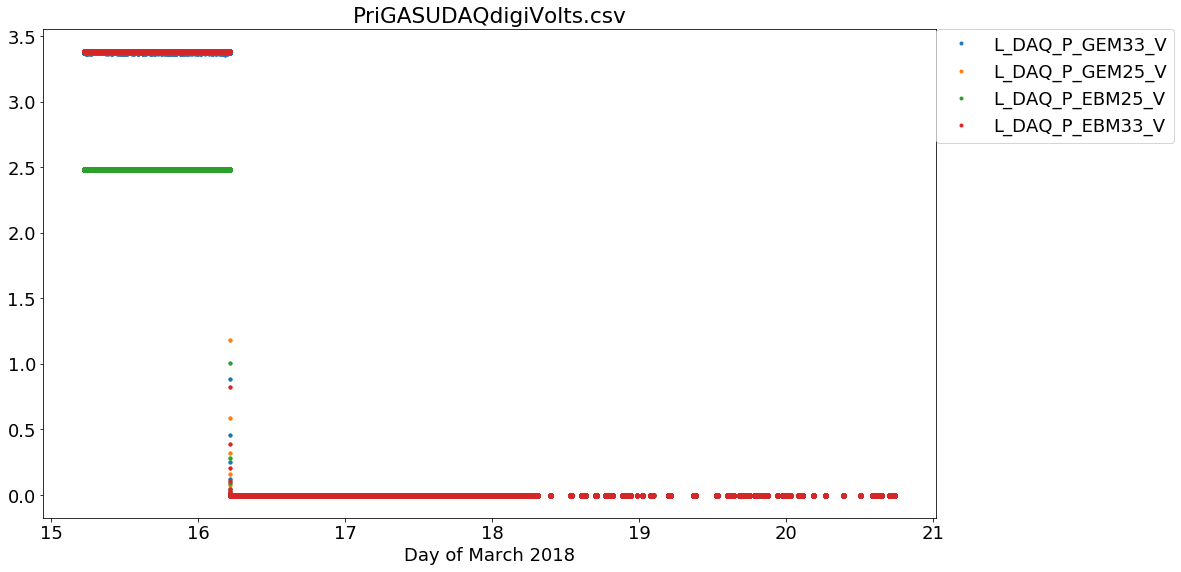

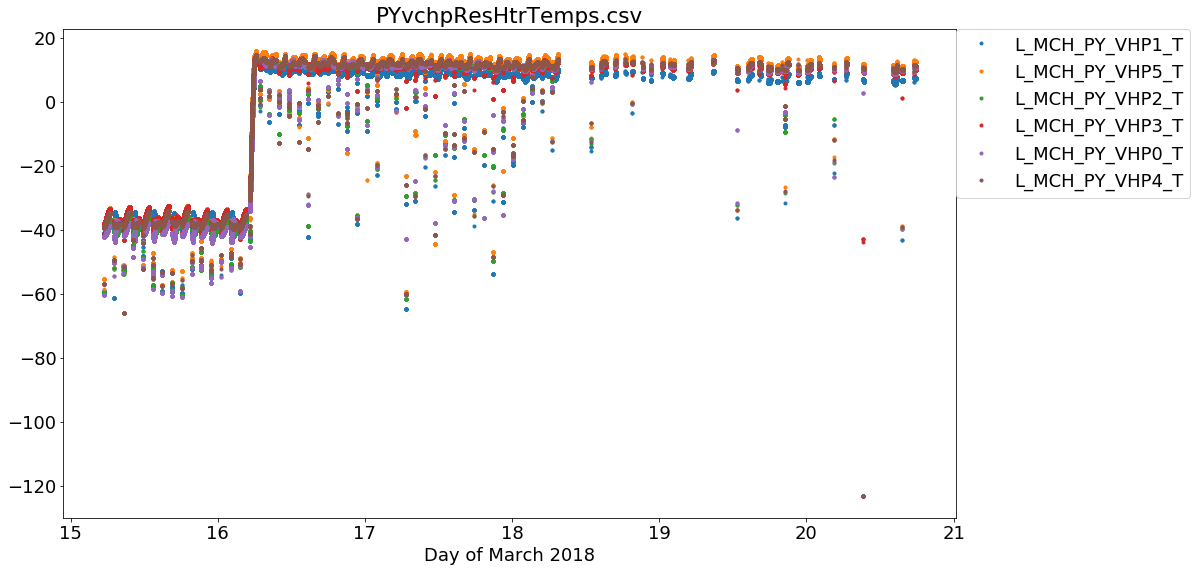

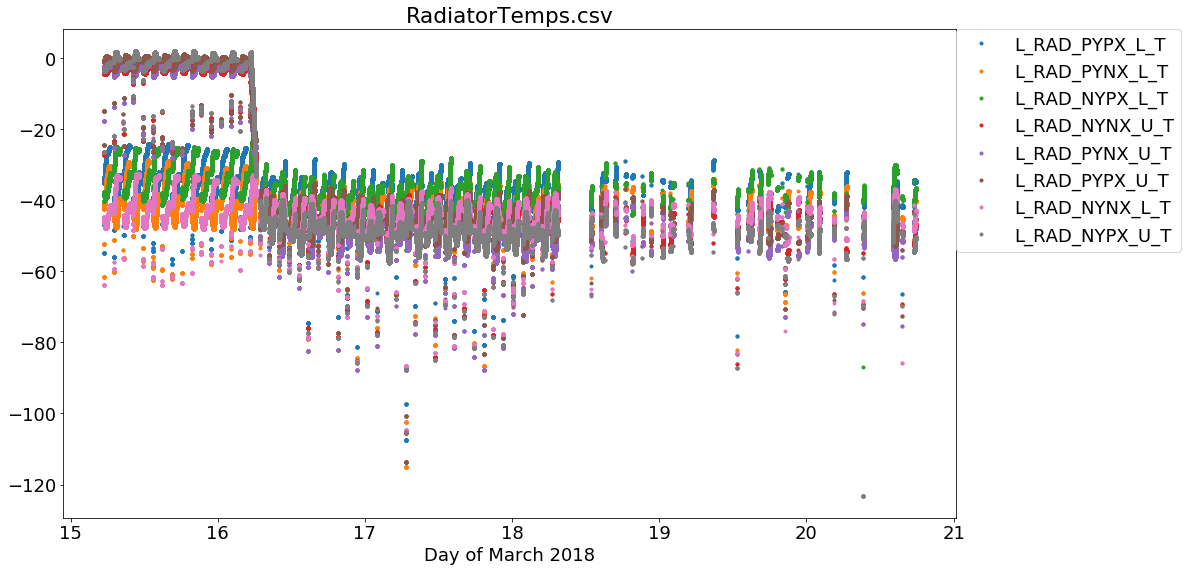

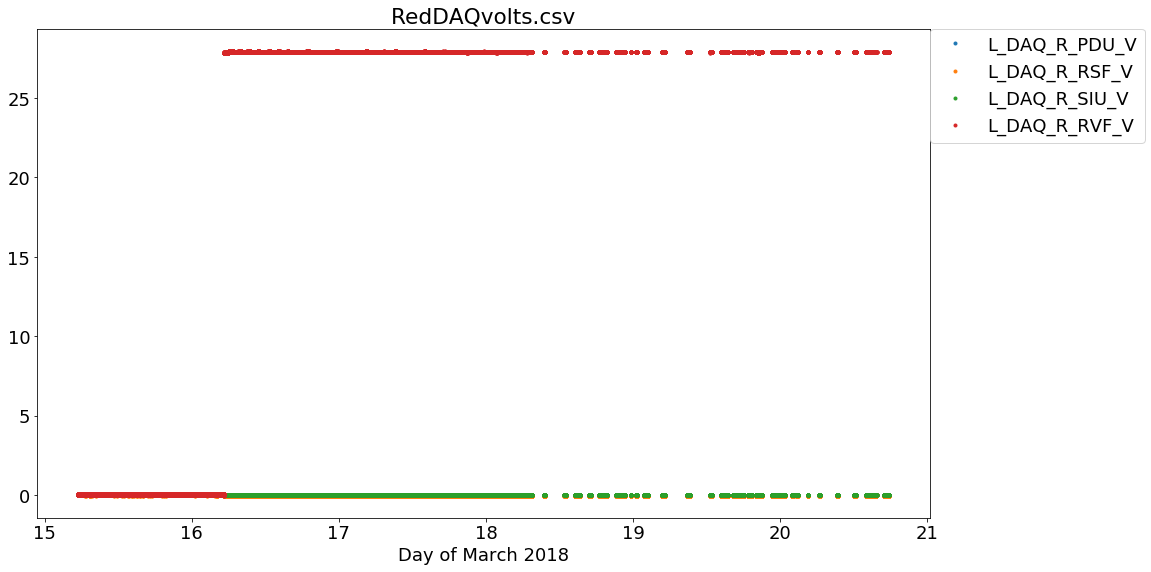

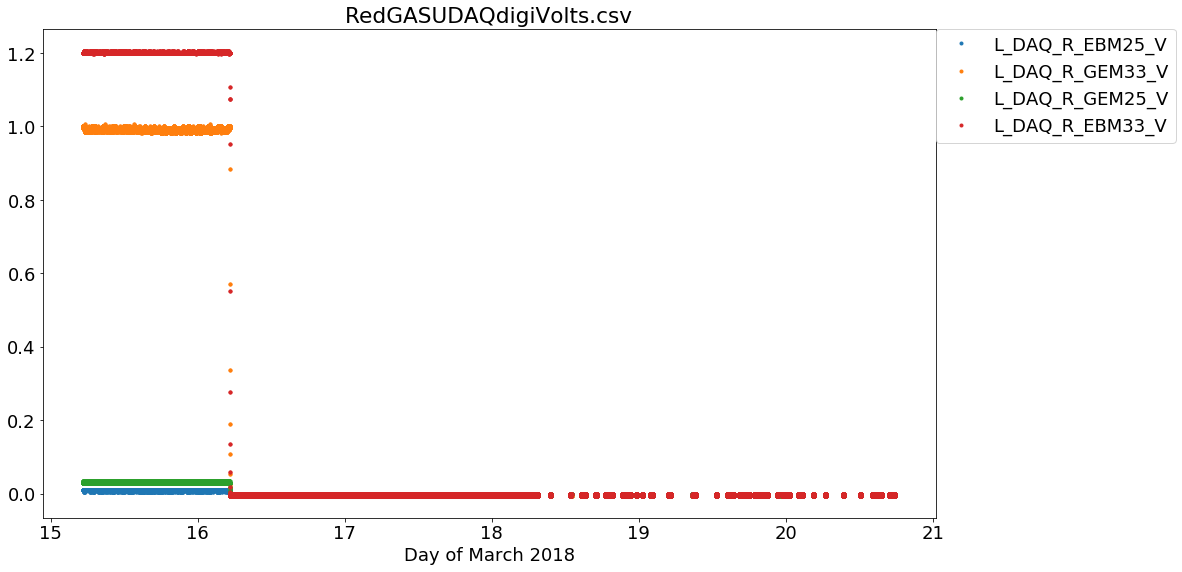

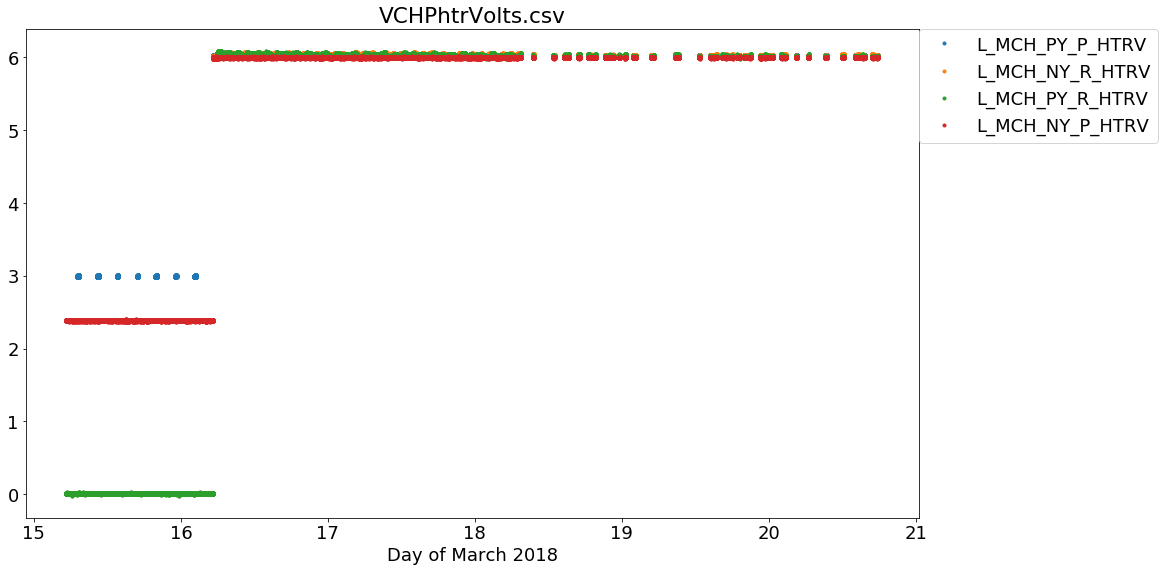

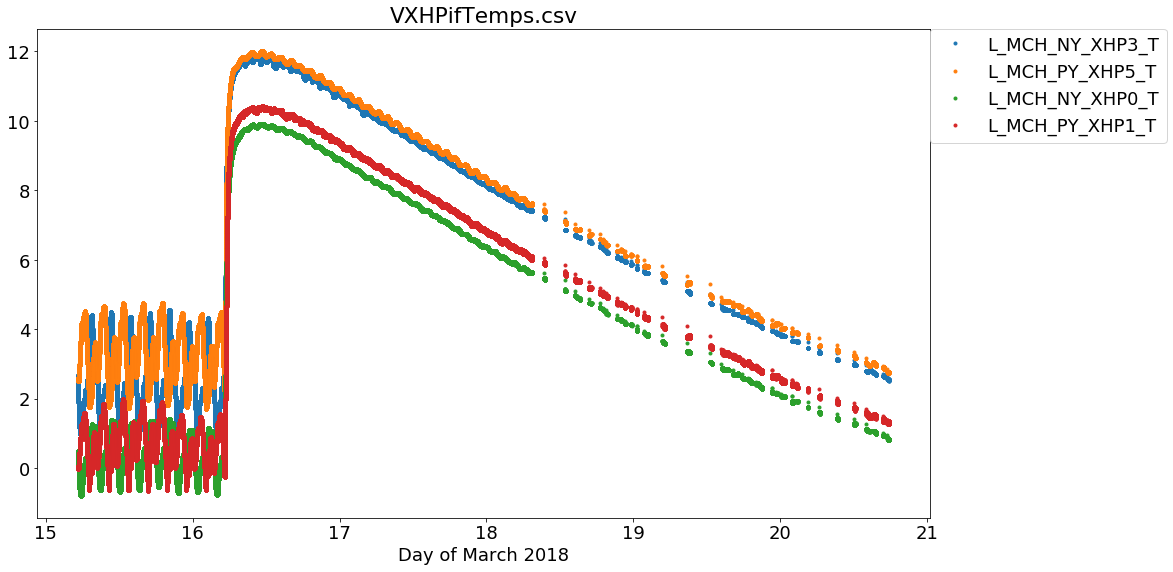

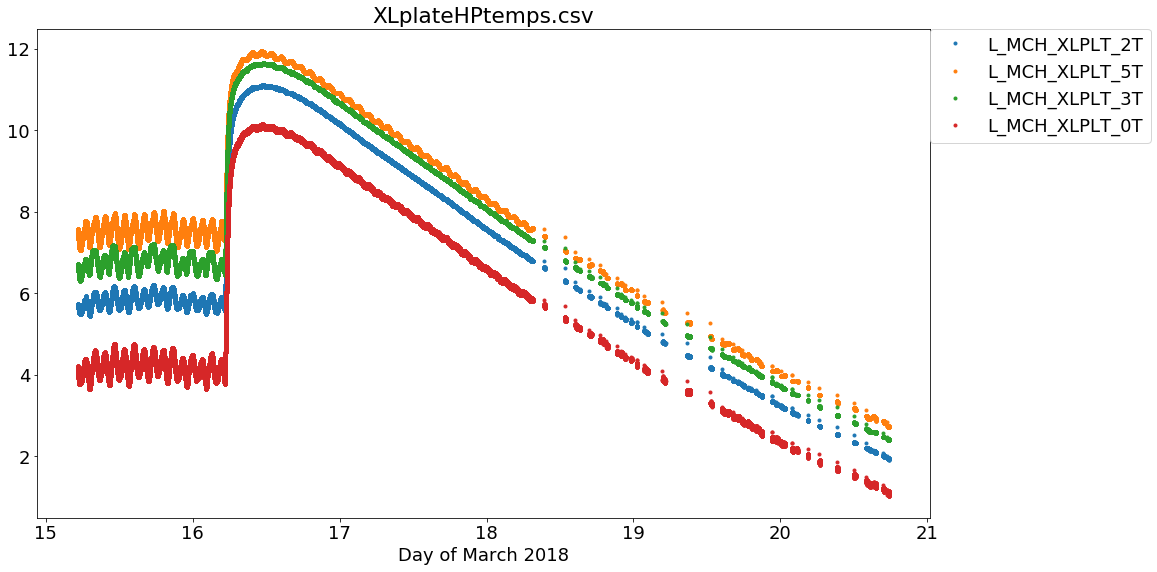

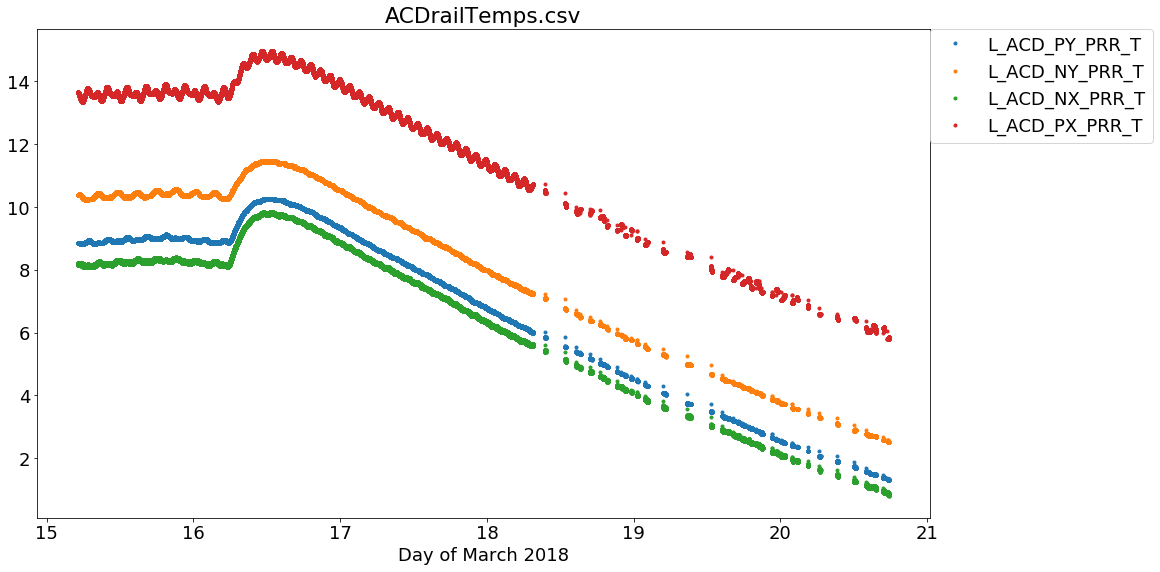

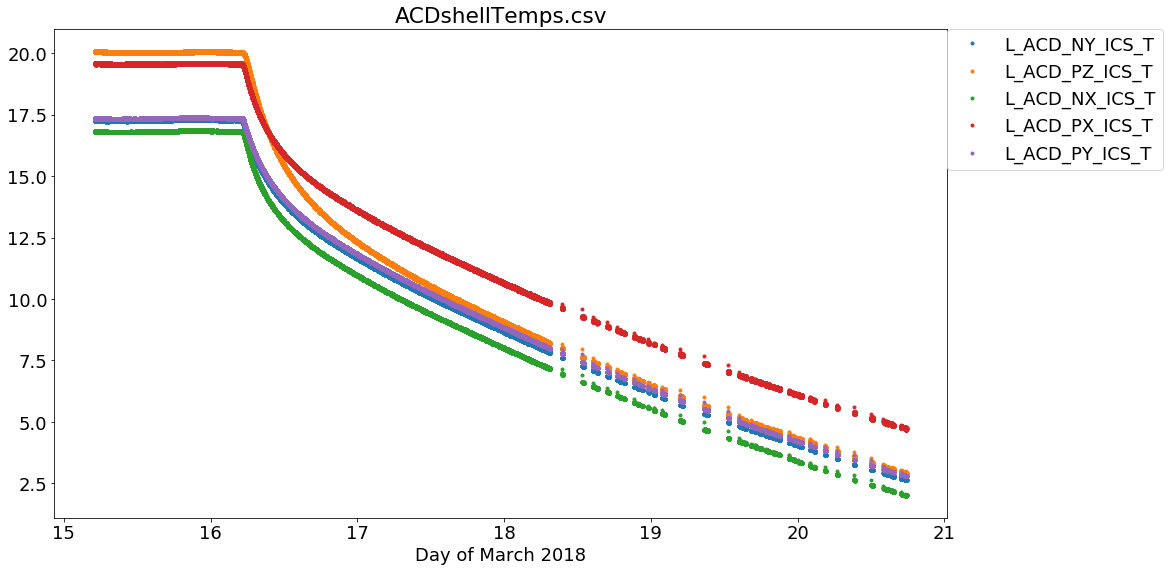

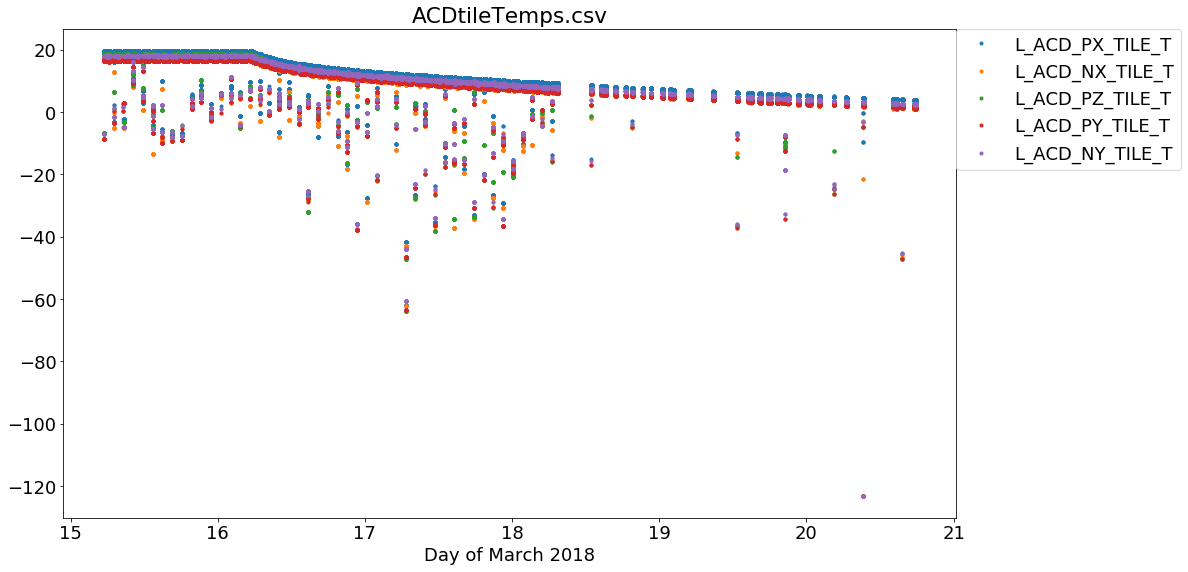

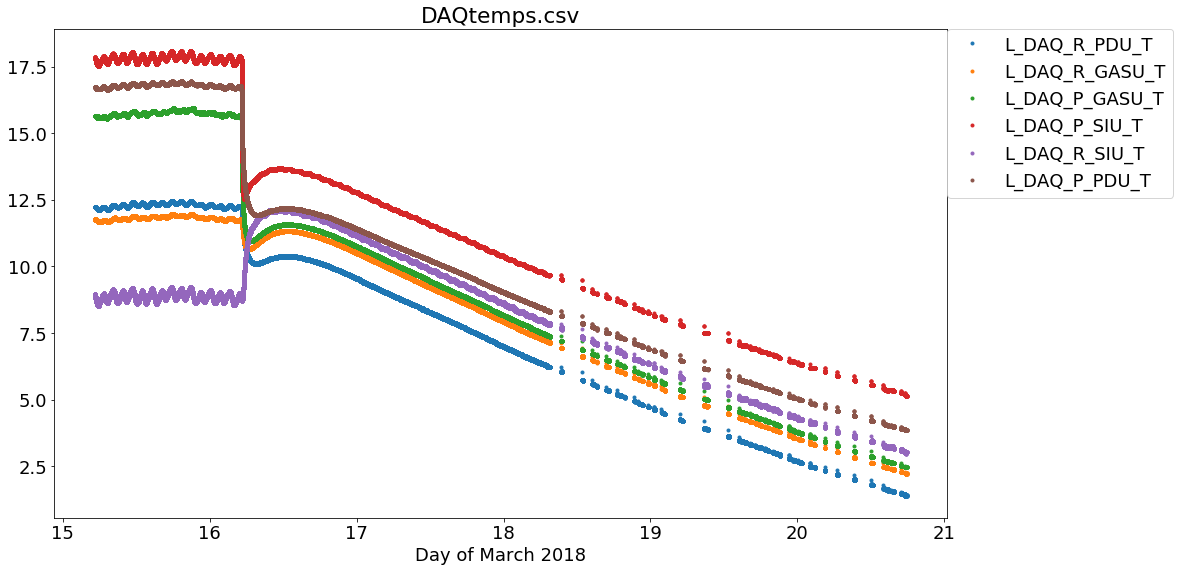

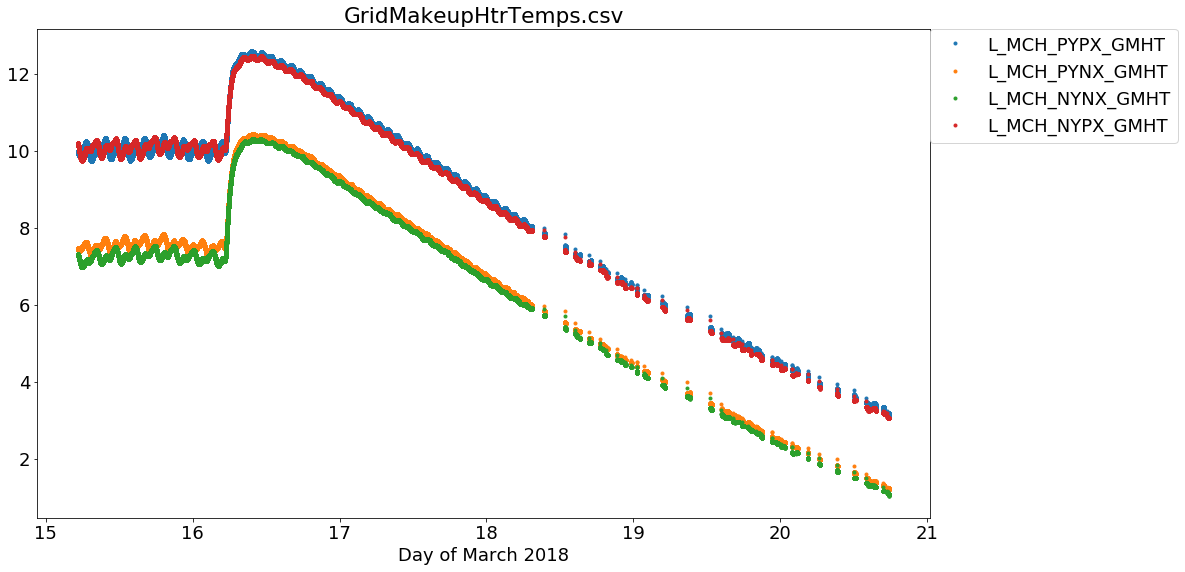

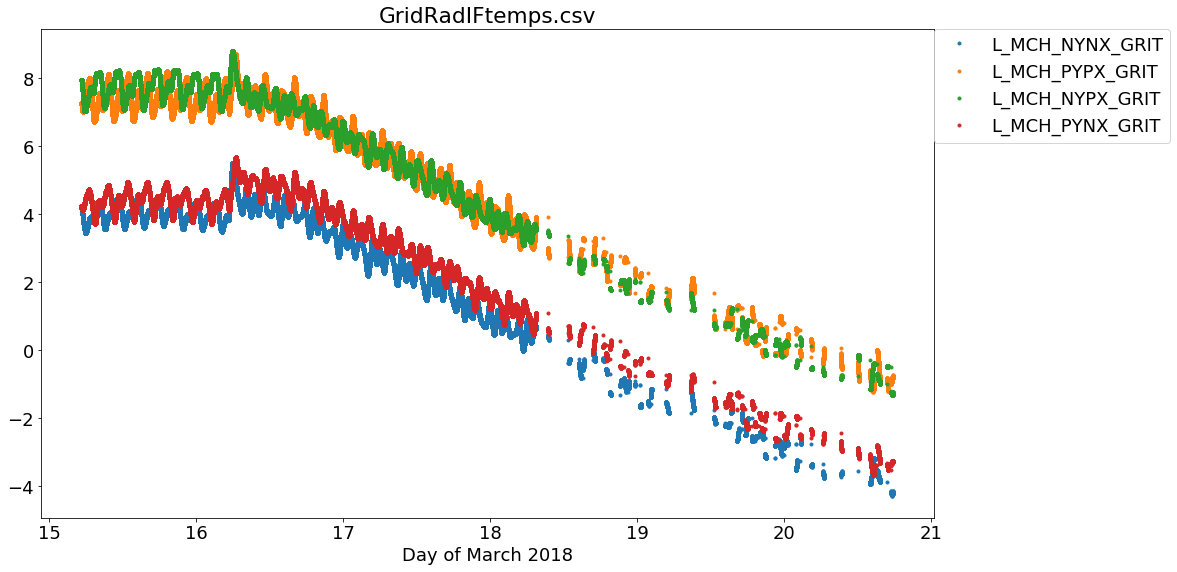

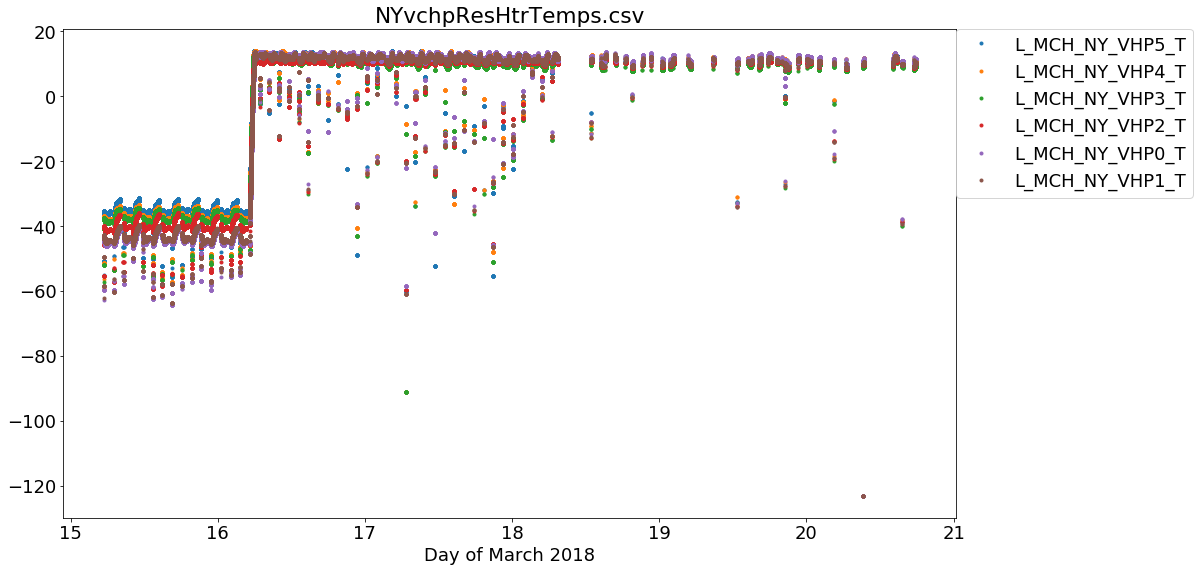

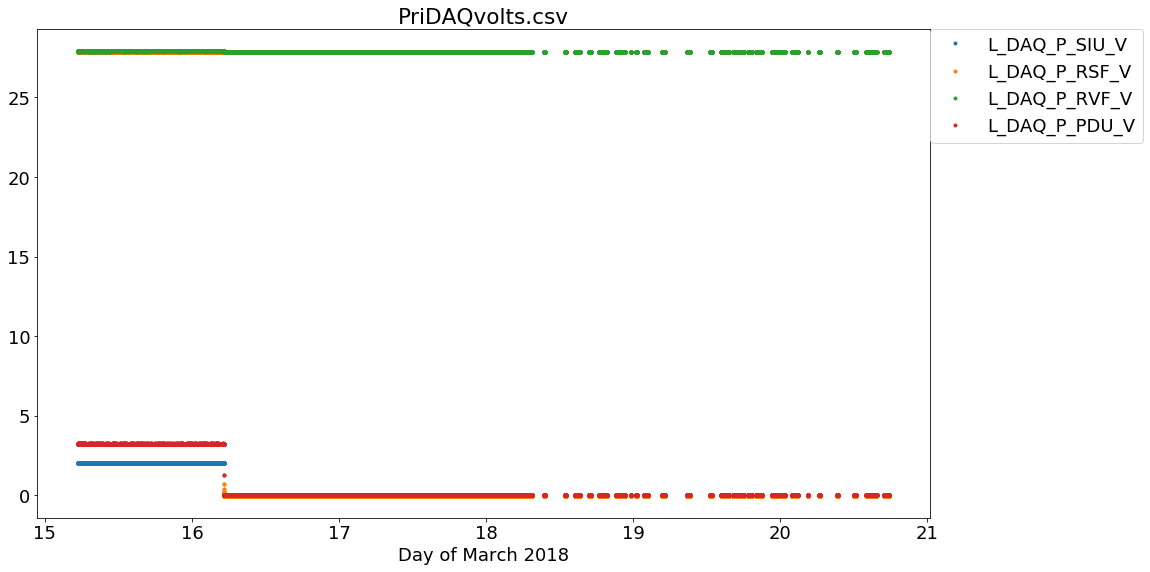

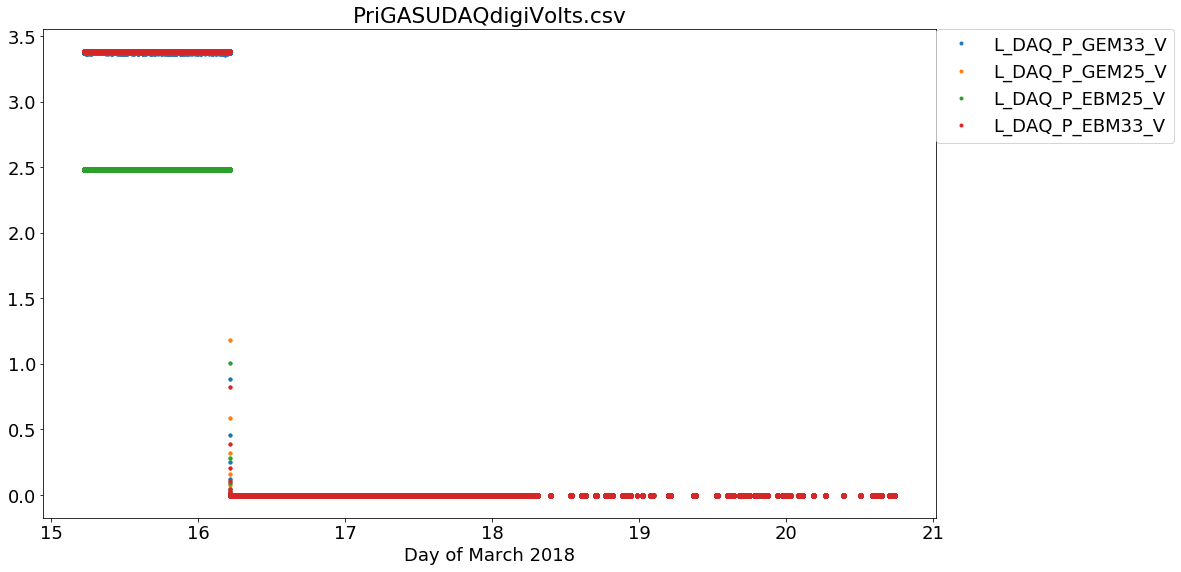

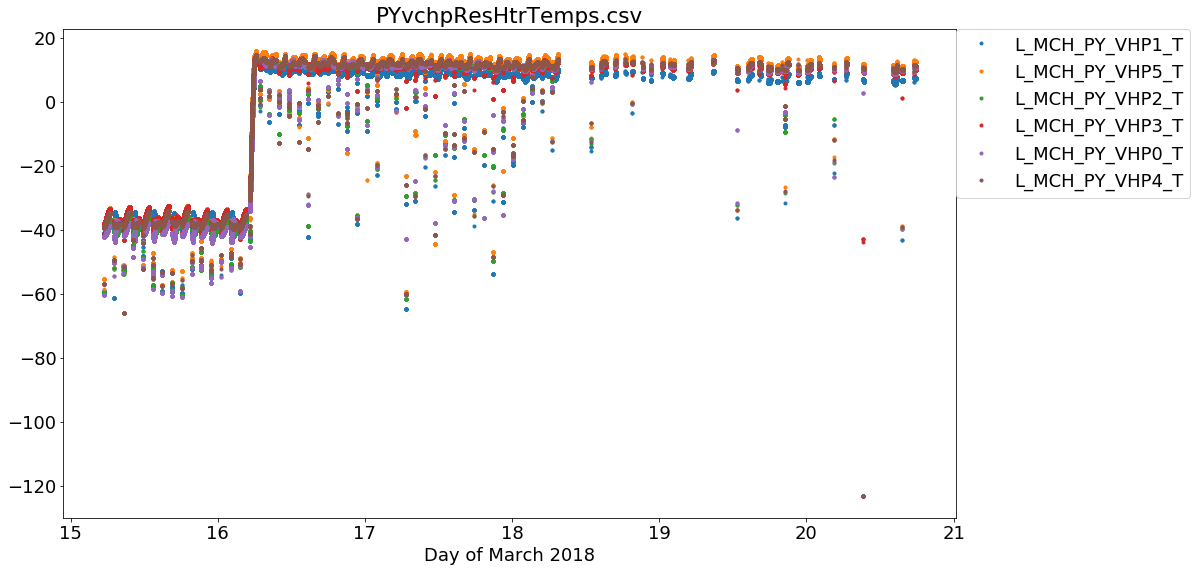

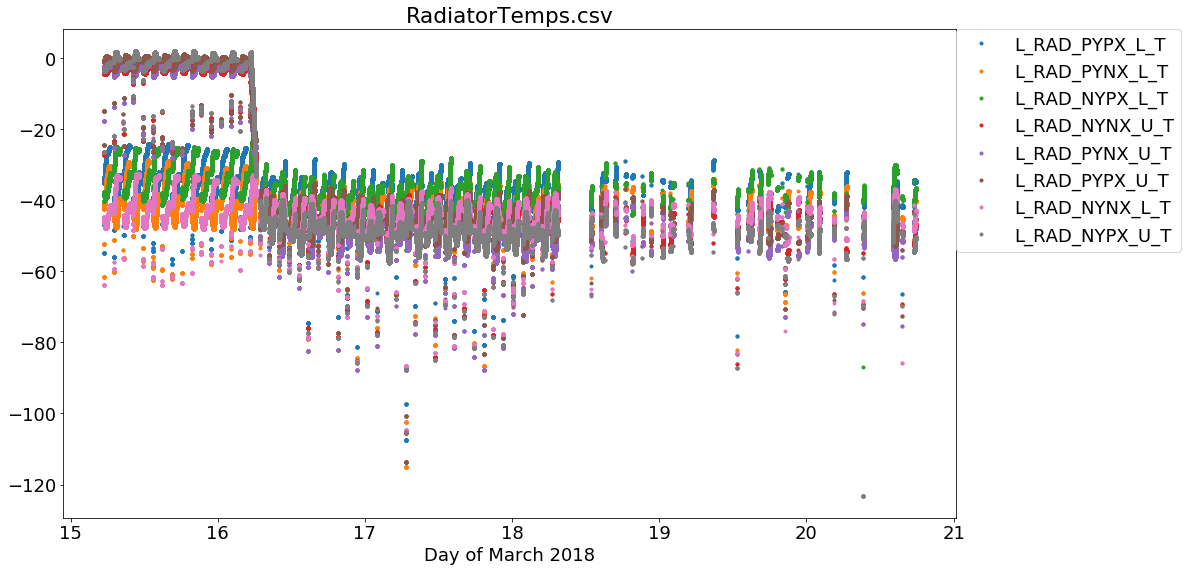

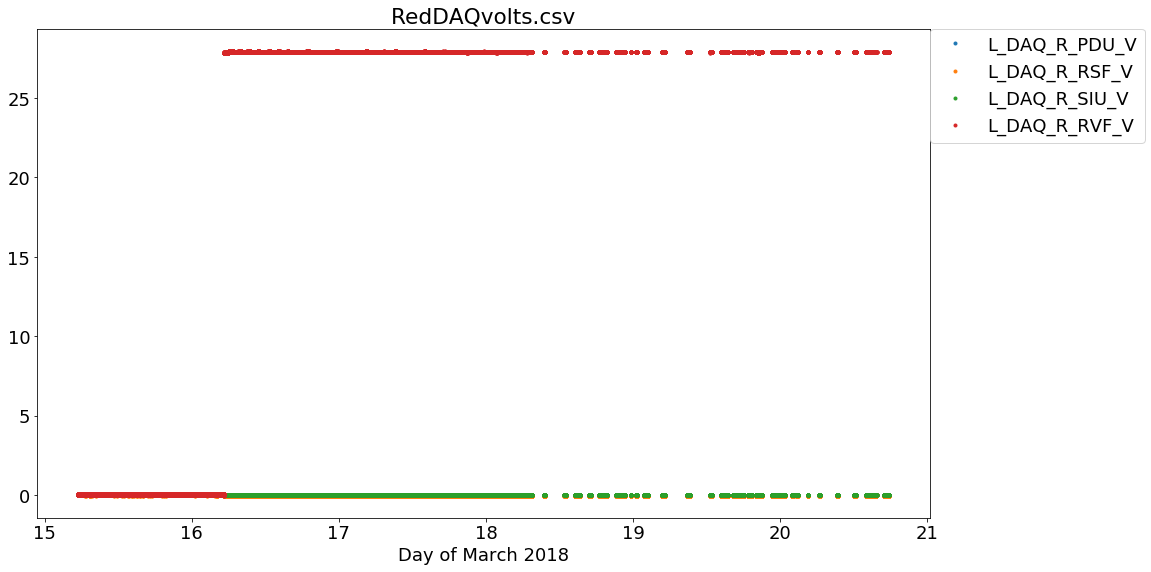

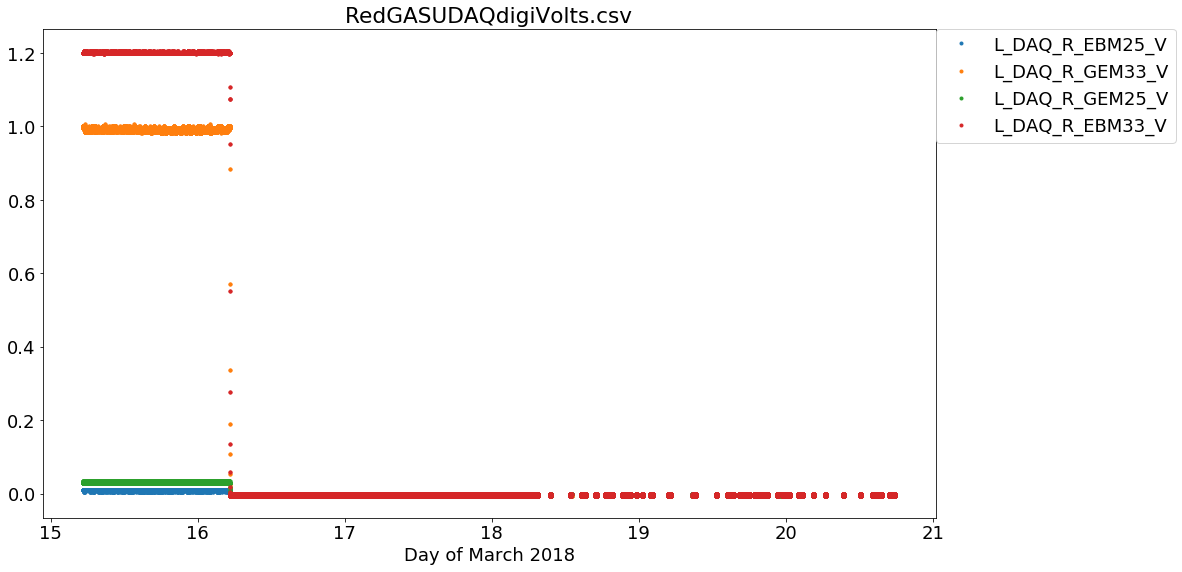

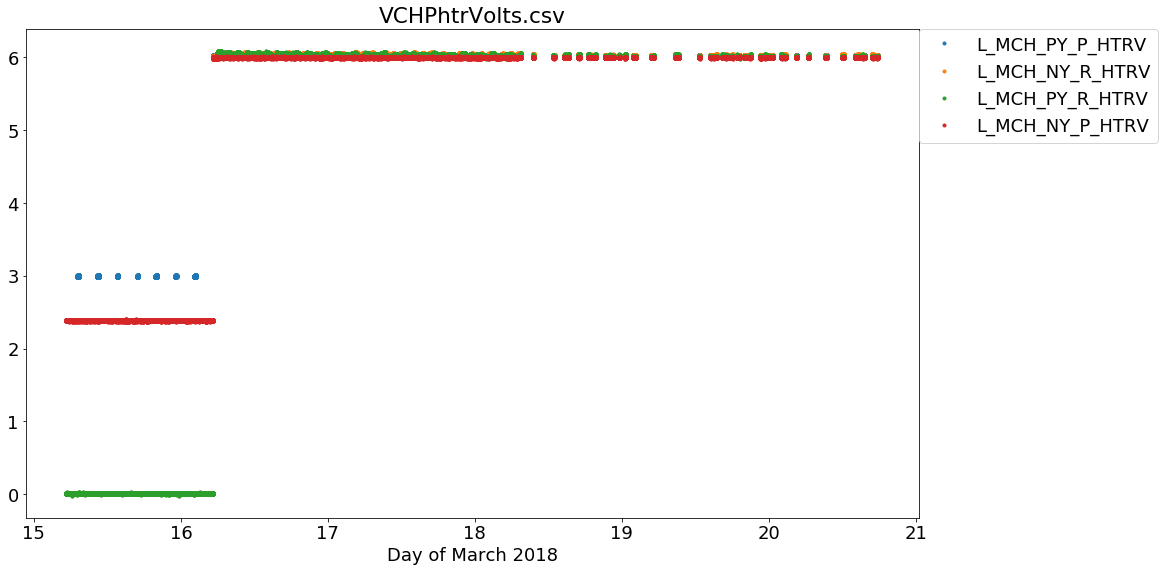

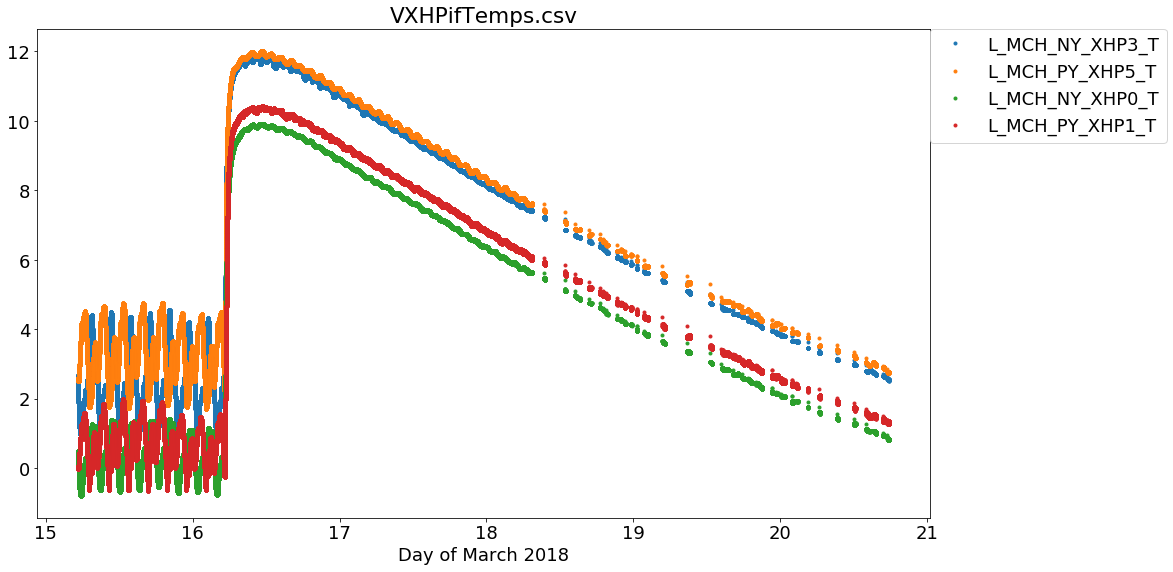

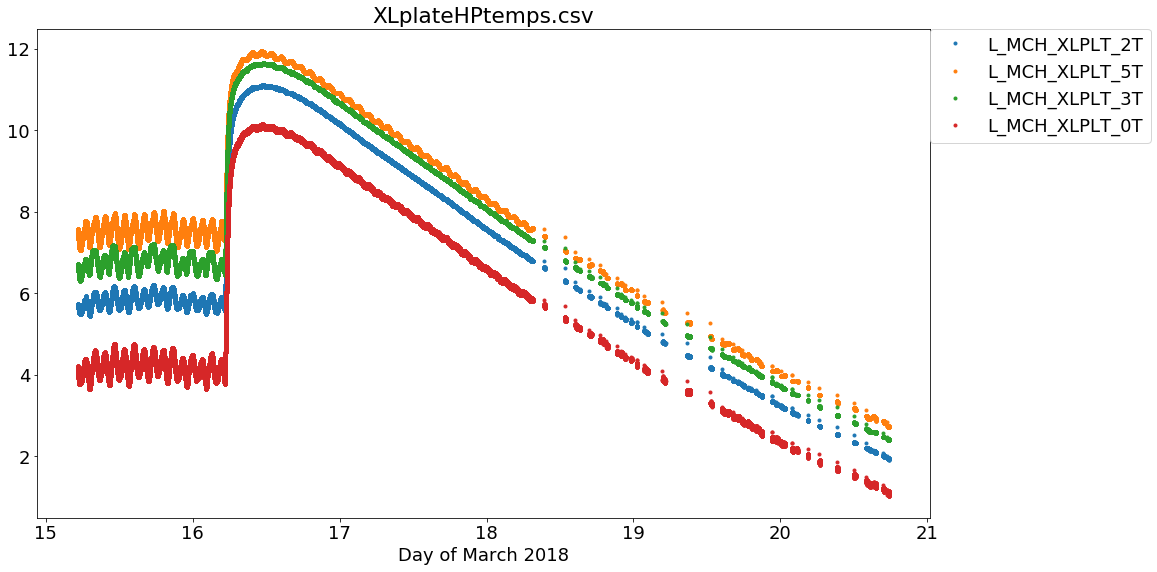

In [5]:
for f in files:
    if ".csv" not in f:
        continue
    t = Table.read(path+f, format='ascii')
    cnames = t.colnames[2:]
    tutc = Time(t['TIME'])-tutc18
#    tutc = Time(t['TIME'])
    insun = t['SACFLAGISINSUN']
    nosun = [i for i, e in enumerate(insun) if not e]
    plt.figure(figsize = [16, 9])
    plt.rc('font', size = 18)
    plt.title(f)
    plt.xlabel('Day of March 2018')
    for n in cnames:
        if n=='SACFLAGISINSUN':
            continue
        list = t[n]
        if n in nTIB:
            list[nosun] = float('NaN')
        plt.plot(tutc.jd,list,'.',label=n)
        plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.)
    plt.show()